# Analise de Distribuição

In [21]:
# Importando as bibliotecas nescessárias
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

In [22]:
# Carregando o banco de dados
df = pd.read_csv("../data/fitness_gym.csv")

In [23]:
# Exibindo amostra dos dados
df.sample(10)

,check_in_id,date,time,member_id,age,gender,membership_type,activity,duration_minutes,calories_burned,activity_category,attendance_streak,satisfaction_score,cancelled,cancellation_reason
139,CHECK_0140,2023-09-21,12:18:00,MEMBER_0019,44,M,Basic,Spinning,43,477,Cardio,9,4,False,NaN
73,CHECK_0073,2023-05-22,13:27:00,MEMBER_0033,44,M,VIP,Spinning,61,677,Cardio,25,4,False,NaN
40,CHECK_0041,2023-03-24,06:20:00,MEMBER_0034,25,M,Premium,Yoga,57,227,Bem-estar,23,5,False,NaN
158,CHECK_0159,2023-10-11,17:31:00,MEMBER_0093,42,F,Basic,Zumba,64,366,Dança,4,5,True,Insatisfação
57,CHECK_0058,2023-05-01,17:00:00,MEMBER_0065,38,M,VIP,Yoga,78,312,Bem-estar,18,4,False,NaN
105,CHECK_0108,2023-07-20,12:58:00,MEMBER_0022,25,F,Premium,CrossFit,67,603,Funcional,7,4,False,NaN
28,CHECK_0029,2023-03-03,08:07:00,MEMBER_0081,29,M,Basic,CrossFit,78,780,Funcional,8,5,False,NaN
152,CHECK_0153,2023-10-03,07:59:00,MEMBER_0079,61,F,Premium,Zumba,52,268,Dança,13,4,False,NaN
109,CHECK_0110,2023-07-25,07:33:00,MEMBER_0072,36,M,Premium,CrossFit,65,650,Funcional,10,3,False,NaN
55,CHECK_0057,2023-04-30,06:28:00,MEMBER_0064,41,M,Basic,Pilates,62,310,Bem-estar,10,4,True,Custo alto


In [24]:
# informações sobre o banco de dados
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 15 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   check_in_id          200 non-null    object
 1   date                 200 non-null    object
 2   time                 200 non-null    object
 3   member_id            200 non-null    object
 4   age                  200 non-null    int64 
 5   gender               200 non-null    object
 6   membership_type      200 non-null    object
 7   activity             200 non-null    object
 8   duration_minutes     200 non-null    int64 
 9   calories_burned      200 non-null    int64 
 10  activity_category    200 non-null    object
 11  attendance_streak    200 non-null    int64 
 12  satisfaction_score   200 non-null    int64 
 13  cancelled            200 non-null    bool  
 14  cancellation_reason  20 non-null     object
dtypes: bool(1), int64(5), object(9)
memory usage: 22.2+ KB


In [25]:
# Descrição superficial dos dados
df.describe()

,age,duration_minutes,calories_burned,attendance_streak,satisfaction_score
count,200.000000,200.000000,200.000000,200.000000,200.00000
mean,42.485000,56.720000,356.055000,13.340000,4.04500
std,13.730711,13.061955,149.449381,6.031275,0.58711
min,18.000000,24.000000,106.000000,1.000000,3.00000
25%,30.000000,47.000000,245.750000,9.000000,4.00000
50%,42.000000,57.000000,328.000000,13.000000,4.00000
75%,56.000000,64.000000,442.000000,18.000000,4.00000
max,64.000000,94.000000,910.000000,28.000000,5.00000


### Acima notamos:

Tempo médio de treino:  1 hora

Média de calórias queimadas por treino: 356 calorias

Média das idade: 42 anos

Idade mínima encontrada: 18 anos

Idade Máxima  encontrada: 64 anos

*********************************

### Gráfico de distribuição das atividades na academia

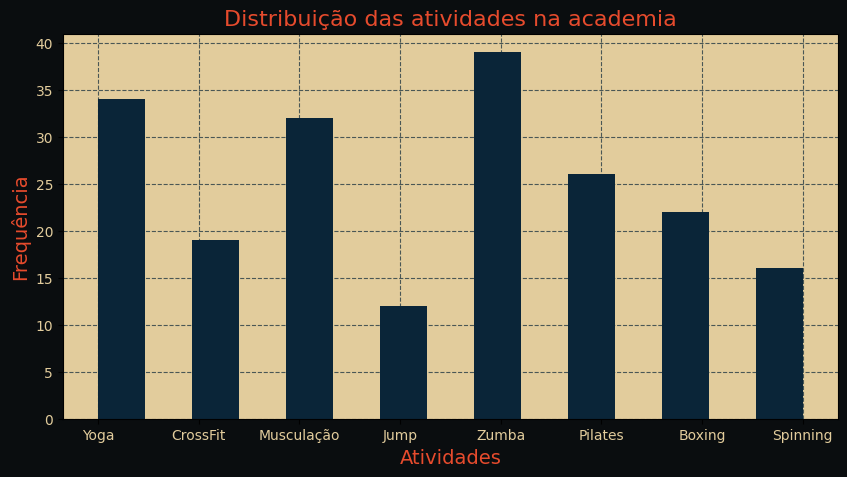

In [26]:
# Seleciona a coluna activity do dataframe df, que contém informações sobre os tipos de atividades praticadas na academia.
activity = df["activity"]

# Configura o tamanho da figura e define uma cor para a área externa da figura.
plt.figure(figsize=(10, 5), facecolor="#0A0D0F")

# Criando um histograma com as atividades praticadas na academia.
plt.hist(activity, color="#0A2538", bins=15)

# Alterando a cor de fundo do gráfico.
plt.gca().set_facecolor("#E2CC9C")


# Adiciona e personaliza a grade do gráfico.
plt.grid(
    True,
    color="#0A2538",
    linestyle="--",
    alpha=0.7,
)

# Adicionando um título ao gráfico, define a cor do título e o tamanho do título.
plt.title(
    "Distribuição das atividades na academia",
    fontsize=16,
    color="#E64B2D",
)

# Labels e ticks.
plt.xlabel(
    "Atividades", fontsize=14, color="#E64B2D"
)
plt.ylabel(
    "Frequência", fontsize=14, color="#E64B2D"
)
plt.xticks(color="#E2CC9C", fontsize=10)
plt.yticks(color="#E2CC9C", fontsize=10)

# Apresenta o gráfico.
plt.show()

[]

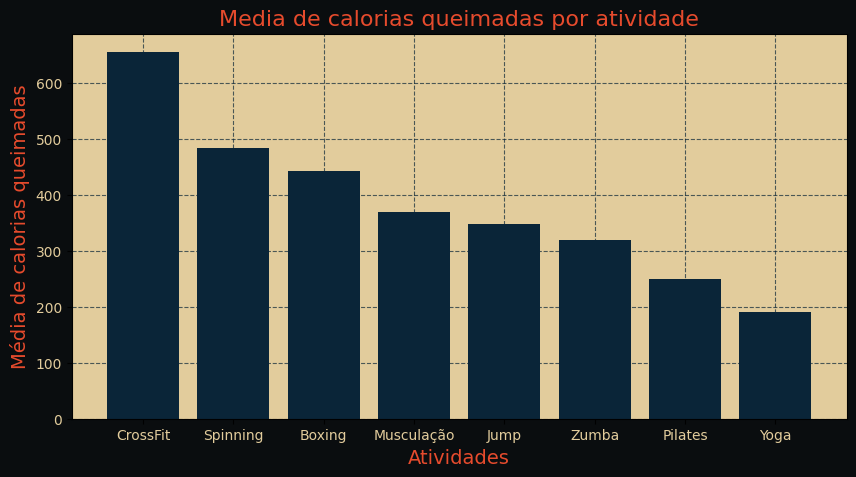

In [27]:
# Agrupa a coluna activity com uma coluna formada pela média de calorias queimadas em cada atividade
calorias_atividade = (
    df.groupby("activity")["calories_burned"]
    .mean()
    .reset_index()
)

# Ordena a coluna pela média de calorias queimadas em ordem decrescente
calorias_atividade.sort_values(
    by="calories_burned",
    ascending=False,
    inplace=True,
)

# Configura o tamanho da figura e define uma cor para a área externa da figura.
plt.figure(figsize=(10, 5), facecolor="#0A0D0F")
# Cria um gráfico de barras com a média de calorias queimadas por atividade na academia.
plt.bar(
    x=calorias_atividade["activity"],
    height=calorias_atividade["calories_burned"],
    color="#0A2538",
)

# Alterando a cor de fundo do gráfico.
plt.gca().set_facecolor("#E2CC9C")

# Adicionando e estilizando a grade
plt.grid(
    True,
    color="#0A2538",
    linestyle="--",
    alpha=0.7,
)

# Adicionando um título ao gráfico, define a cor do título e o tamanho do título.
plt.title(
    "Media de calorias queimadas por atividade",
    fontsize=16,
    color="#E64B2D",
)

# Labels e ticks.
plt.xlabel(
    "Atividades", fontsize=14, color="#E64B2D"
)
plt.ylabel(
    "Média de calorias queimadas",
    fontsize=14,
    color="#E64B2D",
)
plt.xticks(color="#E2CC9C", fontsize=10)
plt.yticks(color="#E2CC9C", fontsize=10)

# Mostra o gráfico.
plt.plot()

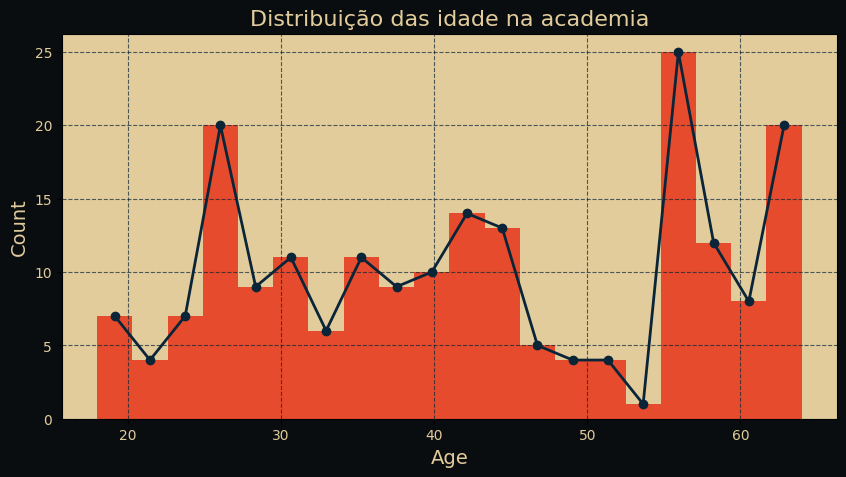

In [28]:
# Pegando as idades
ages = df["age"]


# Configura o tamanho da figura e define uma cor para a área externa da figura.
plt.figure(figsize=(10, 5), facecolor="#0A0D0F")

# Criando um histograma com as idades
plt.hist(ages, bins=20, color="#E64B2D")

# Alterando a cor de fundo do gráfico.
plt.gca().set_facecolor("#E2CC9C")

# Adicionando e estilizando a grade
plt.grid(
    True,
    color="#0A2538",
    alpha=0.7,
    linestyle="--",
)

# Adicionando um título ao gráfico, define a cor do título e o tamanho do título.
plt.title(
    "Distribuição das idade na academia",
    color="#E2CC9C",
    fontsize=16,
)

# Labels e ticks.
plt.xlabel("Age", color="#E2CC9C", fontsize=14)
plt.ylabel("Count", color="#E2CC9C", fontsize=14)
plt.xticks(color="#E2CC9C", fontsize=10)
plt.yticks(color="#E2CC9C", fontsize=10)


# Criando um gráfico em linha
age_counts, bin_edges = np.histogram(
    ages, bins=20
)
bin_centers = 0.5 * (
    bin_edges[:-1] + bin_edges[1:]
)
plt.plot(
    bin_centers,
    age_counts,
    color="#0A2538",
    marker="o",
    linestyle="-",
    linewidth=2,
    label="Linha",
)
plt.show()

In [29]:
# Agrupa a coluna 'activity' contando o número de cancelamentos
Cancel_activity = (
    df.groupby("activity")["cancelled"]
    .count()
    .reset_index()
)

In [30]:
# Ordena o dataframe pelo número de cancelamentos em ordem decrescente
Cancel_activity.sort_values(
    by="cancelled", ascending=False, inplace=True
)

In [31]:
Cancel_activity

,activity,cancelled
7,Zumba,39
6,Yoga,34
3,Musculação,32
4,Pilates,26
0,Boxing,22
1,CrossFit,19
5,Spinning,16
2,Jump,12


<BarContainer object of 8 artists>

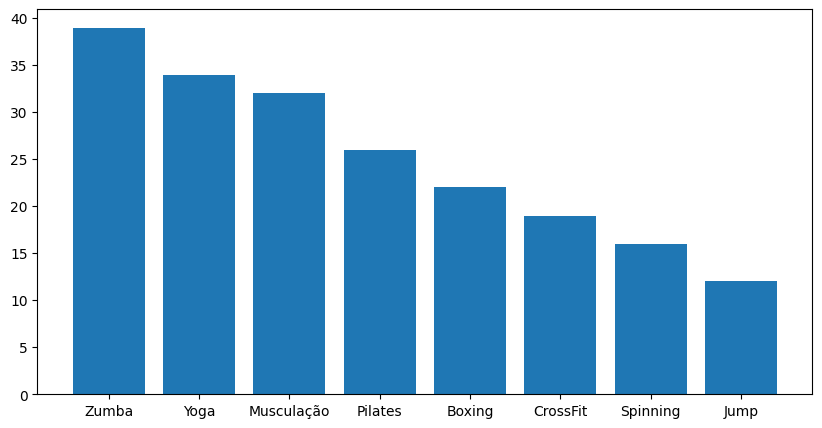

In [32]:
# Cria um gráfico de barras com o número de cancelamentos por atividade
plt.figure(figsize=(10, 5))
plt.bar(
    x=Cancel_activity["activity"],
    height=Cancel_activity["cancelled"],
)

In [33]:
# Agrupa a coluna 'activity_category' calculando a média de idade
df_activity_category_age = (
    df.groupby("activity_category")["age"]
    .mean()
    .reset_index()
)
df_activity_category_age.sort_values(
    by="age", ascending=False, inplace=True
)

In [34]:
df_activity_category_age

,activity_category,age
3,Força,49.500000
0,Bem-estar,47.783333
2,Dança,45.307692
1,Cardio,34.392857
4,Funcional,32.263158
5,Luta,31.954545


In [35]:
# Agrupa a coluna 'activity_category' calculando a média de satisfação
df_activity_category_satisfaction_score = (
    df.groupby("activity_category")[
        "satisfaction_score"
    ]
    .mean()
    .reset_index()
)
df_activity_category_satisfaction_score.sort_values(
    by="satisfaction_score",
    ascending=False,
    inplace=True,
)

<BarContainer object of 6 artists>

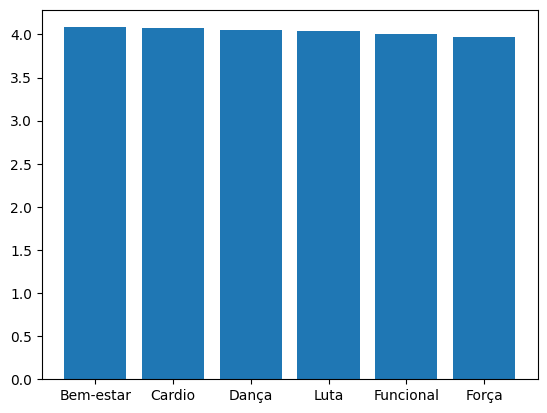

In [36]:
# Cria um gráfico de barras com a média de satisfação por categoria de atividade
plt.bar(
    x=df_activity_category_satisfaction_score[
        "activity_category"
    ],
    height=df_activity_category_satisfaction_score[
        "satisfaction_score"
    ],
)

In [37]:
df["satisfaction_score"].mean()

np.float64(4.045)

In [38]:
colors = [
    "#0A2538",
    "#BF5B32",
    "#E84A2E",
    "#E2CC9C",
]

/tmp/ipykernel_88596/3960162244.py:11: UserWarning: The palette list has more values (4) than needed (3), which may not be intended.
  sns.barplot(


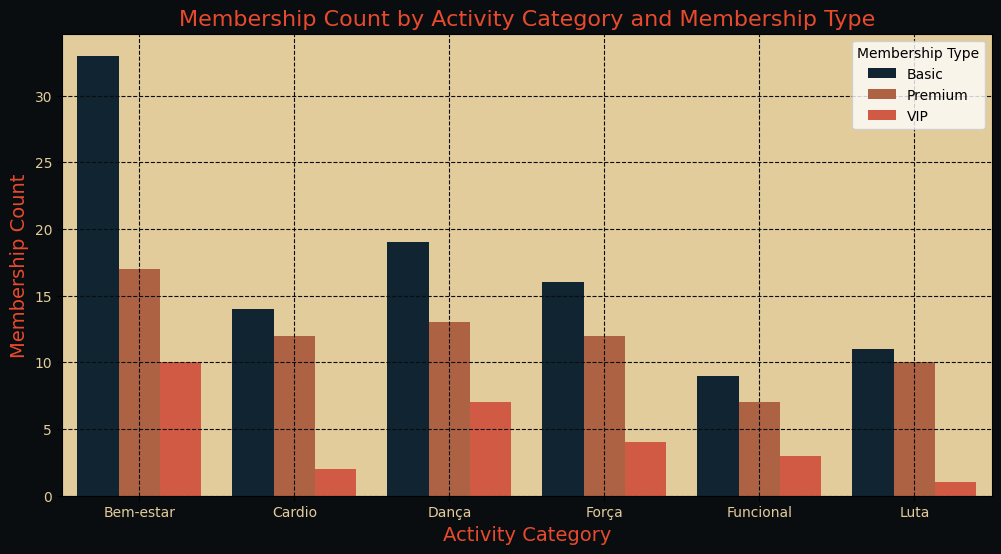

In [39]:
# Agrupa a coluna 'activity_category' e 'membership_type' contando o número de membros
df_activity_category_membership_type = (
    df.groupby(
        ["activity_category", "membership_type"]
    )["membership_type"]
    .count()
    .reset_index(name="membership_count")
)
# Cria um gráfico de barras com a contagem de membros por categoria de atividade e tipo de associação
plt.figure(figsize=(12, 6), facecolor="#0A0D0F")
sns.barplot(
    data=df_activity_category_membership_type,
    x="activity_category",
    y="membership_count",
    hue="membership_type",
    palette=colors,
)

plt.grid(True, color="#0A0D0F", linestyle="--")

plt.gca().set_facecolor("#E2CC9C")

# Adiciona título e labels
plt.title(
    "Membership Count by Activity Category and Membership Type",
    color="#E84A2E",
    fontsize=16,
)
plt.xlabel(
    "Activity Category",
    color="#E84A2E",
    fontsize=14,
)
plt.ylabel(
    "Membership Count",
    color="#E84A2E",
    fontsize=14,
)
plt.xticks(color="#E2CC9C", fontsize=10)
plt.yticks(color="#E2CC9C", fontsize=10)

# Exibe a legenda
plt.legend(title="Membership Type")
plt.show()

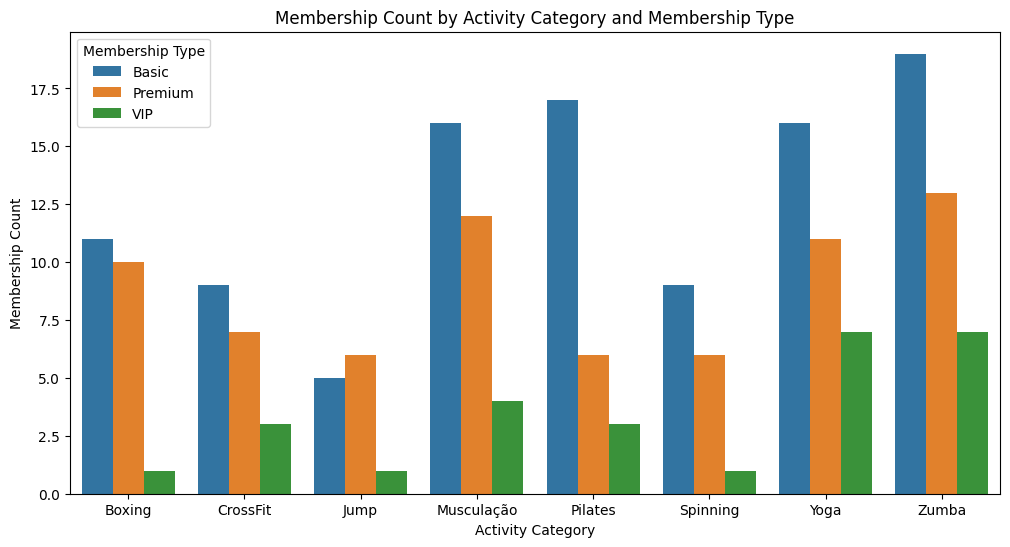

In [40]:
# Agrupa a coluna 'activity' e 'membership_type' contando o número de membros
df_activity_membership_type = (
    df.groupby(["activity", "membership_type"])[
        "membership_type"
    ]
    .count()
    .reset_index(name="membership_count")
)
# Cria um gráfico de barras com a contagem de membros por atividade e tipo de associação
plt.figure(figsize=(12, 6))
sns.barplot(
    data=df_activity_membership_type,
    x="activity",
    y="membership_count",
    hue="membership_type",
)

# Adiciona título e labels
plt.title(
    "Membership Count by Activity Category and Membership Type"
)
plt.xlabel("Activity Category")
plt.ylabel("Membership Count")

# Exibe a legenda
plt.legend(title="Membership Type")
plt.show()